# Preparing a prediction model for profit of 50_startups data

 Importing the necessasry librabries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

 Import data

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head(20)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.shape

(50, 5)

In [4]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [171]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# ASSUMPTION CHECK

Linearity Check

By using Scatter plot/Pairplot.

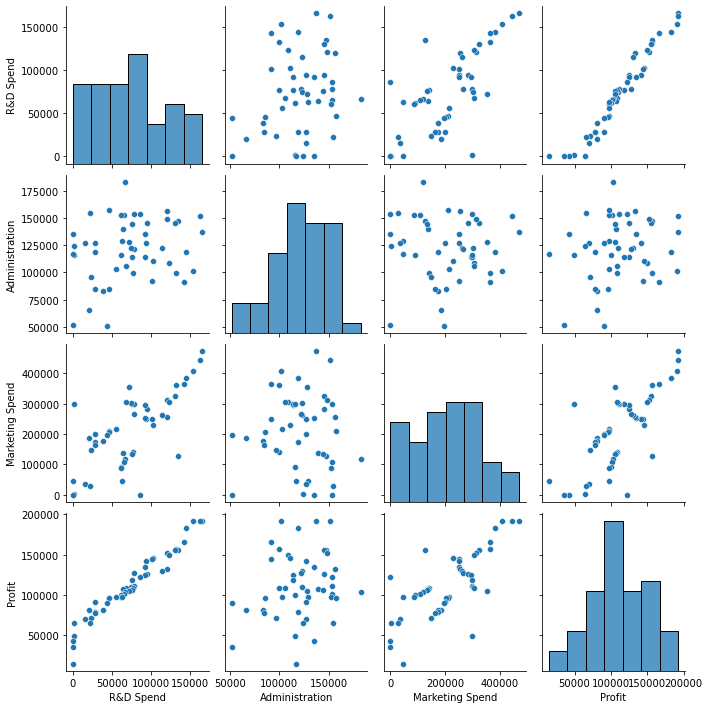

In [172]:
sns.pairplot(df)
plt.show()

 Observation linearity failed

In [174]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Data preparation

In [5]:
del df['State']

In [7]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [6]:
df.head(20)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [9]:
df=df.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


#  Model Building and Evaluating using Statsmodels

In [10]:
import statsmodels.formula.api as smf

In [11]:
model_1 = smf.ols('Profit~RD_Spend',data =df ).fit()

Understading R2 and AdjustedR2

In [12]:
model_1 = smf.ols('Profit~RD_Spend',data =df ).fit()
print('R2Score      :',model_1.rsquared)
print('Adjusted R2 score : ',model_1.rsquared_adj)

R2Score      : 0.9465353160804393
Adjusted R2 score :  0.9454214684987817


In [13]:
model_2=smf.ols('Profit~RD_Spend+Administration',data=df).fit()
print('R2Score      :',model_2.rsquared)
print('Adjusted R2 score : ',model_2.rsquared_adj)

R2Score      : 0.9478129385009173
Adjusted R2 score :  0.9455922124796797


In [14]:
model_3=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=df).fit()
print('R2Score      :',model_3.rsquared)
print('Adjusted R2 score : ',model_3.rsquared_adj)

R2Score      : 0.9507459940683246
Adjusted R2 score :  0.9475337762901719


Obeservation:Always R2 score increases if we increase the number of inputs. And if the input contributes more for the prediction, there will a higher increase in the R2 score.

Preparing table for each models with r2 value

In [187]:
table=pd.DataFrame({'Models':['model_1','model_2','model_3'],'RSquaredvalue':[model_1.rsquared,model_2.rsquared,model_3.rsquared]})

In [188]:
table

,Models,RSquaredvalue
0,model_1,0.946535
1,model_2,0.947813
2,model_3,0.950746


NOTE:From the above model it is clear that mode_3 is best model as R2Score and Adjusted R2 score is already 95%

Model Testing

In [81]:
testdata=pd.DataFrame({'RD_Spend':2000,'Administration':3000,'Marketing_Spend':4000},index=[0])
testdata

,RD_Spend,Administration,Marketing_Spend
0,2000,3000,4000


In [82]:
model_3.predict(testdata)

0    51762.087444
dtype: float64

# Appling log tranformation technique

In [15]:
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [21]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df['log_RD_Spend']=np.log(df['RD_Spend'])
df['log_Administration']=np.log(df['Administration'])
df['log_Marketing_Spend']=np.log(df['Marketing_Spend'])
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit,log_RD_Spend,log_Administration,log_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849


In [56]:
df2=df.loc[:,['log_RD_Spend','log_Administration','log_Marketing_Spend','Profit']]
df2.tail()

,log_RD_Spend,log_Administration,log_Marketing_Spend,Profit
45,6.907985,11.729270,7.551675,64926.08
46,7.181942,11.659760,12.601873,49490.75
47,-inf,11.816187,-inf,42559.73
48,6.295358,10.854047,-inf,35673.41
49,-inf,11.669791,10.718256,14681.40


In the above data we are having inf values so replacing inf values with nan

In [66]:
df2.replace([np.inf,-np.inf], np.nan, inplace=True)
df2.tail()            

,log_RD_Spend,log_Administration,log_Marketing_Spend,Profit
45,6.907985,11.729270,7.551675,64926.08
46,7.181942,11.659760,12.601873,49490.75
47,NaN,11.816187,NaN,42559.73
48,6.295358,10.854047,NaN,35673.41
49,NaN,11.669791,10.718256,14681.40


Droping nan values from the data

In [69]:
df2.dropna().tail()

,log_RD_Spend,log_Administration,log_Marketing_Spend,Profit
42,10.070735,11.474077,11.904975,71498.49
43,9.648965,11.754948,10.478250,69758.98
44,10.006844,11.949929,10.251843,65200.33
45,6.907985,11.729270,7.551675,64926.08
46,7.181942,11.659760,12.601873,49490.75


Model building

In [70]:
log_model_1 = smf.ols('Profit~log_RD_Spend',data =df2).fit()

Understanding R2 AND R2ADJ SCORES

In [71]:
log_model_1 = smf.ols('Profit~log_RD_Spend',data=df2).fit()
print('R2Score      :',log_model_1.rsquared)
print('Adjusted R2 score : ',log_model_1.rsquared_adj)

R2Score      : 0.624631415668875
Adjusted R2 score :  0.616471229052981


In [72]:
log_model_2 = smf.ols('Profit~log_RD_Spend+log_Administration',data=df2).fit()
print('R2Score      :',log_model_2.rsquared)
print('Adjusted R2 score : ',log_model_2.rsquared_adj)

R2Score      : 0.6246995776589053
Adjusted R2 score :  0.6080195588881899


In [73]:
log_model_3 = smf.ols('Profit~log_RD_Spend+log_Administration+log_Marketing_Spend',data=df2).fit()
print('R2Score      :',log_model_3.rsquared)
print('Adjusted R2 score : ',log_model_3.rsquared_adj)

R2Score      : 0.6167542135106917
Adjusted R2 score :  0.5893795144757411


In [75]:
table_1=pd.DataFrame({'log_models':['log_model_1','log_model_2','log_model_3'],'RSquaredvalue':[log_model_1.rsquared,log_model_2.rsquared,log_model_3.rsquared]})

In [76]:
table_1

,log_models,RSquaredvalue
0,log_model_1,0.624631
1,log_model_2,0.624700
2,log_model_3,0.616754


# Applying squareroot transformation

In [86]:
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit,log_RD_Spend,log_Administration,log_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849


In [89]:
df_data=df.iloc[:,:4]

In [91]:
df_data.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [92]:
squareroot_data=np.sqrt(df_data)

In [98]:
squareroot_data.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,406.631529,369.997027,686.865416,438.476715
1,403.234051,389.072731,666.257105,437.940704
2,391.716109,318.033882,638.697534,437.093114
3,379.963696,344.487808,619.031195,427.670422
4,376.971272,302.310718,605.118517,407.661551


Model building and understanding r2 score and r2 adj score

In [110]:
squarerroot_model_1=smf.ols('Profit~RD_Spend',data=squareroot_data).fit()
print('R2Score           :',squarerroot_model_1.rsquared)
print('Adjusted R2 score :',squarerroot_model_1.rsquared_adj)

R2Score           : 0.9290411227839082
Adjusted R2 score : 0.9275628128419062


In [111]:
squarerroot_model_2=smf.ols('Profit~RD_Spend+Administration',data=squareroot_data).fit()
print('R2Score           :',squarerroot_model_2.rsquared)
print('Adjusted R2 score :',squarerroot_model_2.rsquared_adj)

R2Score           : 0.9297800931729404
Adjusted R2 score : 0.9267920120313634


In [112]:
squarerroot_model_3=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=squareroot_data).fit()
print('R2Score           :',squarerroot_model_3.rsquared)
print('Adjusted R2 score :',squarerroot_model_3.rsquared_adj)

R2Score           : 0.9305435277653866
Adjusted R2 score : 0.9260137578370423


In [114]:
table_2=pd.DataFrame({'squareroot_models':['squareroot_model_1','squareroot_model_2','squareroot_model_3'],'RSquaredvalue':[squarerroot_model_1.rsquared,squarerroot_model_2.rsquared,squarerroot_model_3.rsquared]})

In [115]:
table_2

,squareroot_models,RSquaredvalue
0,squareroot_model_1,0.929041
1,squareroot_model_2,0.929780
2,squareroot_model_3,0.930544


# CONCLUSION

From the above all the models it is clear that only model_3 is havings best r2score and Adjusted r2score that is 95% and 94% respectively and model_3 i have shown with test data also

# TOYOTACOROLLA PROBLEM 

Importing data

In [117]:
toyota_data=pd.read_csv('ToyotaCorolla.csv')
toyota_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


Data preparation

In [120]:
toyota_data.shape

(1436, 38)

In [121]:
toyota_data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

Preparing data as per given columns


In [125]:
toyota_newdata=toyota_data.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_newdata.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [126]:
toyota_newdata.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [127]:
toyota_newdata.shape

(1436, 9)

In [133]:
toyota_newdata.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [141]:
X=toyota_newdata.drop(labels='Price',axis=1)
y=toyota_newdata[['Price']]

In [138]:
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [149]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


Model building

Here am using sklearn library

Model Trainig

In [150]:
from sklearn.linear_model import LinearRegression

In [153]:
linear_model=LinearRegression()
linear_model.fit(X,y)

LinearRegression()

Model Testing

In [155]:
y_pred=linear_model.predict(X)
y_pred

array([[16812.58050518],
       [16272.35518581],
       [16800.73245987],
       ...,
       [ 8454.29800682],
       [ 8578.03812148],
       [10402.43833285]])

In [161]:
error=y - y_pred
error

,Price
0,-3312.580505
1,-2522.355186
2,-2850.732460
3,-1476.496731
4,-2472.419010
...,...
1431,-1293.758297
1432,2553.661579
1433,45.701993
1434,-1328.038121


from sklearn.metrics import mean_squared_error

In [160]:
mean_squared_error(y,y_pred)

1790935.608390293

# Model validation techniques

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [165]:
X_train.shape,y_train.shape

((1148, 8), (1148, 1))

In [166]:
X_test.shape,y_test.shape

((288, 8), (288, 1))

Model Training

Training data

In [169]:
linear_model_2=LinearRegression()
linear_model_2.fit(X_train,y_train)

LinearRegression()

In [171]:
y_train_pred=linear_model_2.predict(X_train)
y_train_pred

array([[ 7895.35460929],
       [11297.67906071],
       [13379.52087103],
       ...,
       [ 7457.09725548],
       [ 8151.14408175],
       [ 8182.17162762]])

In [172]:
mean_squared_error(y_train,y_train_pred)

1770689.9165881798

Testing data

In [177]:
y_pred_test=linear_model_2.predict(X_test)
y_pred_test

array([[13216.93418908],
       [ 8902.44376346],
       [ 8800.63272622],
       [15476.84975455],
       [ 5745.19606222],
       [ 9430.62852914],
       [ 9357.91242059],
       [ 5968.44255342],
       [ 9164.33930204],
       [ 6111.28615542],
       [18555.14811667],
       [10996.64958564],
       [ 7740.17066819],
       [ 9299.70160019],
       [ 8497.53104505],
       [ 9288.566465  ],
       [ 8410.25185792],
       [16621.43974643],
       [14440.54121823],
       [ 9310.06841648],
       [13607.89273407],
       [13042.35033462],
       [ 9504.04394351],
       [ 6875.82517929],
       [ 9092.65716359],
       [14192.00658617],
       [ 9254.71211843],
       [11423.67195532],
       [ 7804.30251023],
       [16418.01338377],
       [11403.70876142],
       [ 8165.52474461],
       [ 9446.95570766],
       [13945.44046428],
       [10288.53346092],
       [13080.27588873],
       [ 8020.67169985],
       [ 9238.96258078],
       [ 7835.47090147],
       [14157.96690938],


In [178]:
mean_squared_error(y_test,y_pred_test)

1890054.9949856442

# Check MSE (mean_squared_error)for Log Transformation inputs

In [179]:
toyota_newdata.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [182]:
toyota_newdata['log_Age_08_04']=np.log(toyota_newdata['Age_08_04'])
toyota_newdata['log_KM']=np.log(toyota_newdata['KM'])
toyota_newdata['log_HP']=np.log(toyota_newdata['HP'])                                
toyota_newdata['log_cc']=np.log(toyota_newdata['cc'])
toyota_newdata['log_Doors']=np.log(toyota_newdata['Doors'])
toyota_newdata['log_Gears']=np.log(toyota_newdata['Gears'])
toyota_newdata['log_Quarterly_Tax']=np.log(toyota_newdata['Quarterly_Tax'])
toyota_newdata['log_Weight']=np.log(toyota_newdata['Weight'])                                 

In [183]:
toyota_newdata.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,log_Age_08_04,log_KM,log_HP,log_cc,log_Doors,log_Gears,log_Quarterly_Tax,log_Weight
0,13500,23,46986,90,2000,3,5,210,1165,3.135494,10.757605,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
1,13750,23,72937,90,2000,3,5,210,1165,3.135494,11.197351,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
2,13950,24,41711,90,2000,3,5,210,1165,3.178054,10.638520,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
3,14950,26,48000,90,2000,3,5,210,1165,3.258097,10.778956,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
4,13750,30,38500,90,2000,3,5,210,1170,3.401197,10.558414,4.49981,7.600902,1.098612,1.609438,5.347108,7.064759


In [187]:
log_transformed_newdata=toyota_newdata.iloc[:,10:17]
X=log_transformed_newdata
X 

,log_KM,log_HP,log_cc,log_Doors,log_Gears,log_Quarterly_Tax,log_Weight
0,10.757605,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
1,11.197351,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
2,10.638520,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
3,10.778956,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
4,10.558414,4.499810,7.600902,1.098612,1.609438,5.347108,7.064759
...,...,...,...,...,...,...,...
1431,9.930324,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
1432,9.852194,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1433,9.741909,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1434,9.736015,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644


In [188]:
y=toyota_newdata[['Price']]
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [191]:
X_train.shape,y_train.shape

((1148, 7), (1148, 1))

In [192]:
X_test.shape,y_test.shape

((288, 7), (288, 1))

Model Training

In [194]:
linear_model_3=LinearRegression()
linear_model_3.fit(X_train,y_train)

LinearRegression()

In [196]:
y_pred_train=linear_model_3.predict(X_train)
y_pred_train

array([[ 7810.26277787],
       [12671.87393162],
       [11818.30607792],
       ...,
       [ 8861.68849191],
       [10862.52068322],
       [10418.42735842]])

In [198]:
mean_squared_error(y_train,y_pred_train)

5464954.064876698

Model testing

In [200]:
y_pred_test1=linear_model_3.predict(X_test)
y_pred_test1

array([[11984.38488343],
       [ 7254.37891725],
       [11384.50262302],
       [13576.0754365 ],
       [ 7673.46597927],
       [ 9748.42248019],
       [11872.30128024],
       [ 8656.73463788],
       [ 9123.86653328],
       [ 8295.88662664],
       [16032.44092758],
       [ 8655.08754101],
       [ 8697.50567707],
       [ 8728.68255141],
       [ 9685.09056048],
       [11103.37760616],
       [ 7916.97620495],
       [14002.43820989],
       [12056.07507395],
       [ 9748.6464335 ],
       [12588.81030045],
       [10249.23046833],
       [ 8820.61557692],
       [ 9122.00940822],
       [ 9355.0115118 ],
       [12889.18275838],
       [10374.87689692],
       [11996.34131611],
       [10983.81253321],
       [13554.5565665 ],
       [ 9431.72831927],
       [10531.63608347],
       [ 8972.26480452],
       [12219.42212688],
       [11146.83420275],
       [11666.68572363],
       [ 8739.5494172 ],
       [ 9696.67146549],
       [ 8840.66146583],
       [11710.26936055],


In [201]:
mean_squared_error(y_test,y_pred_test1)

5463202.036080616